In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.shape

(3999, 12)

In [5]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [6]:
df.describe()



,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


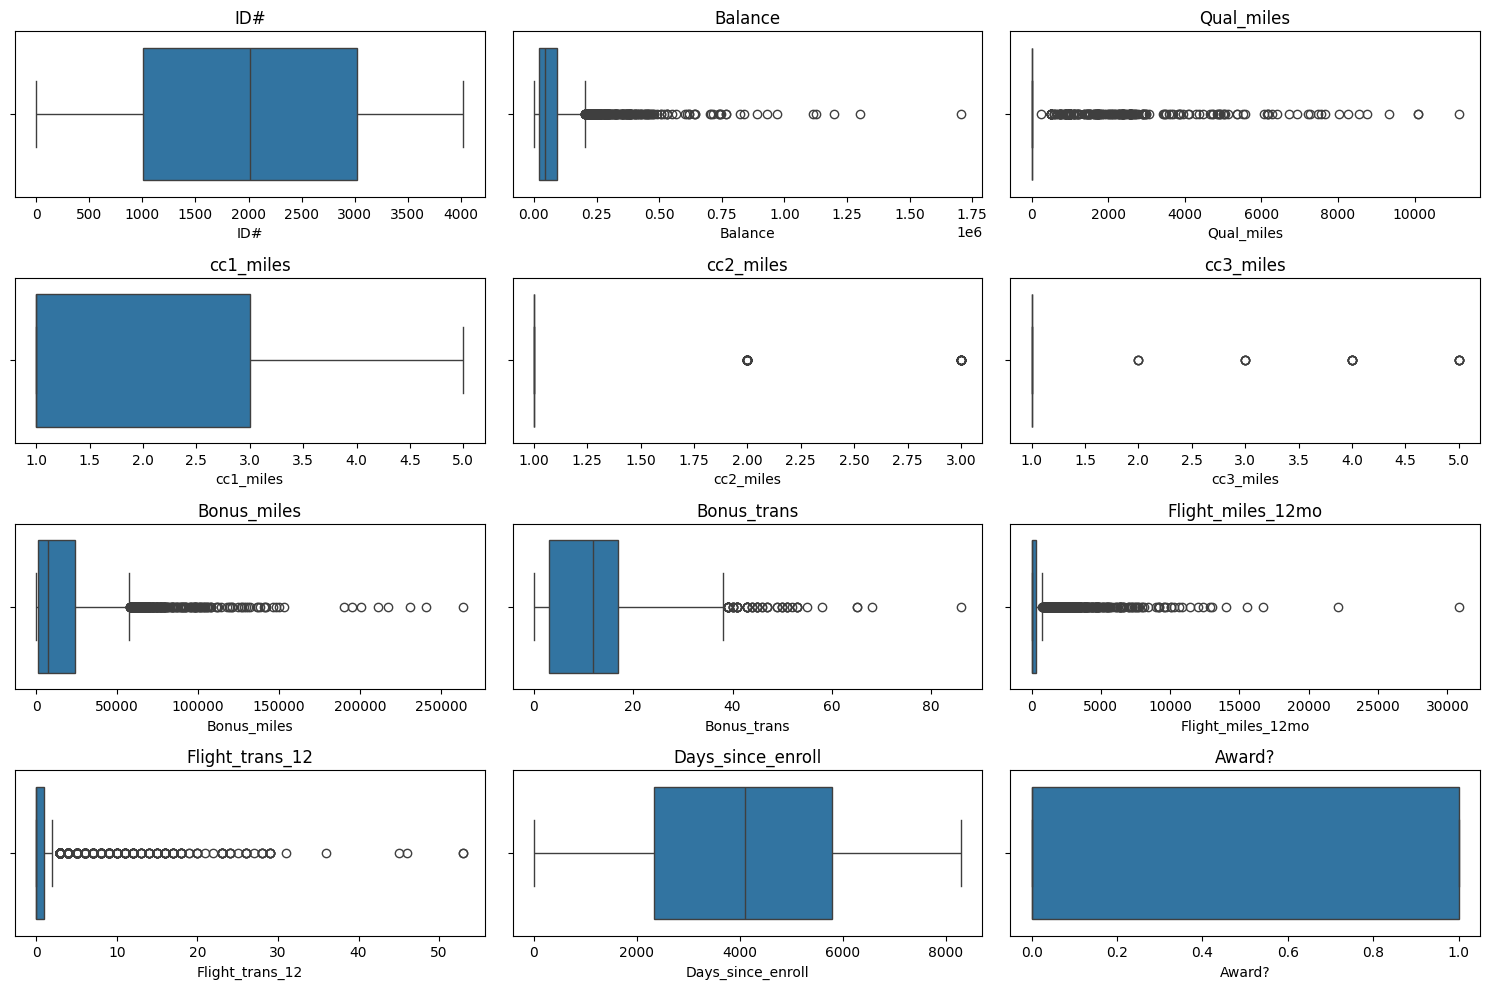

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
df.drop(['ID#','Award?'], axis=1, inplace=True)

In [10]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [11]:
# Select numerical columns for outlier detection after dropping columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Replace outliers with upper/lower bounds based on IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, np.where(df[col] < lower_bound, lower_bound, df[col]))

print("Outliers replaced.")

Outliers replaced.


In [12]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0


In [13]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Display potential outliers for each column (based on the bounds used for replacement)
print("Values that were considered outliers (before replacement):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}:")
    display(outliers)

Values that were considered outliers (before replacement):

Outliers in Balance:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in Qual_miles:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in cc1_miles:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in cc2_miles:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in cc3_miles:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in Bonus_miles:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in Bonus_trans:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in Flight_miles_12mo:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in Flight_trans_12:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll



Outliers in Days_since_enroll:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


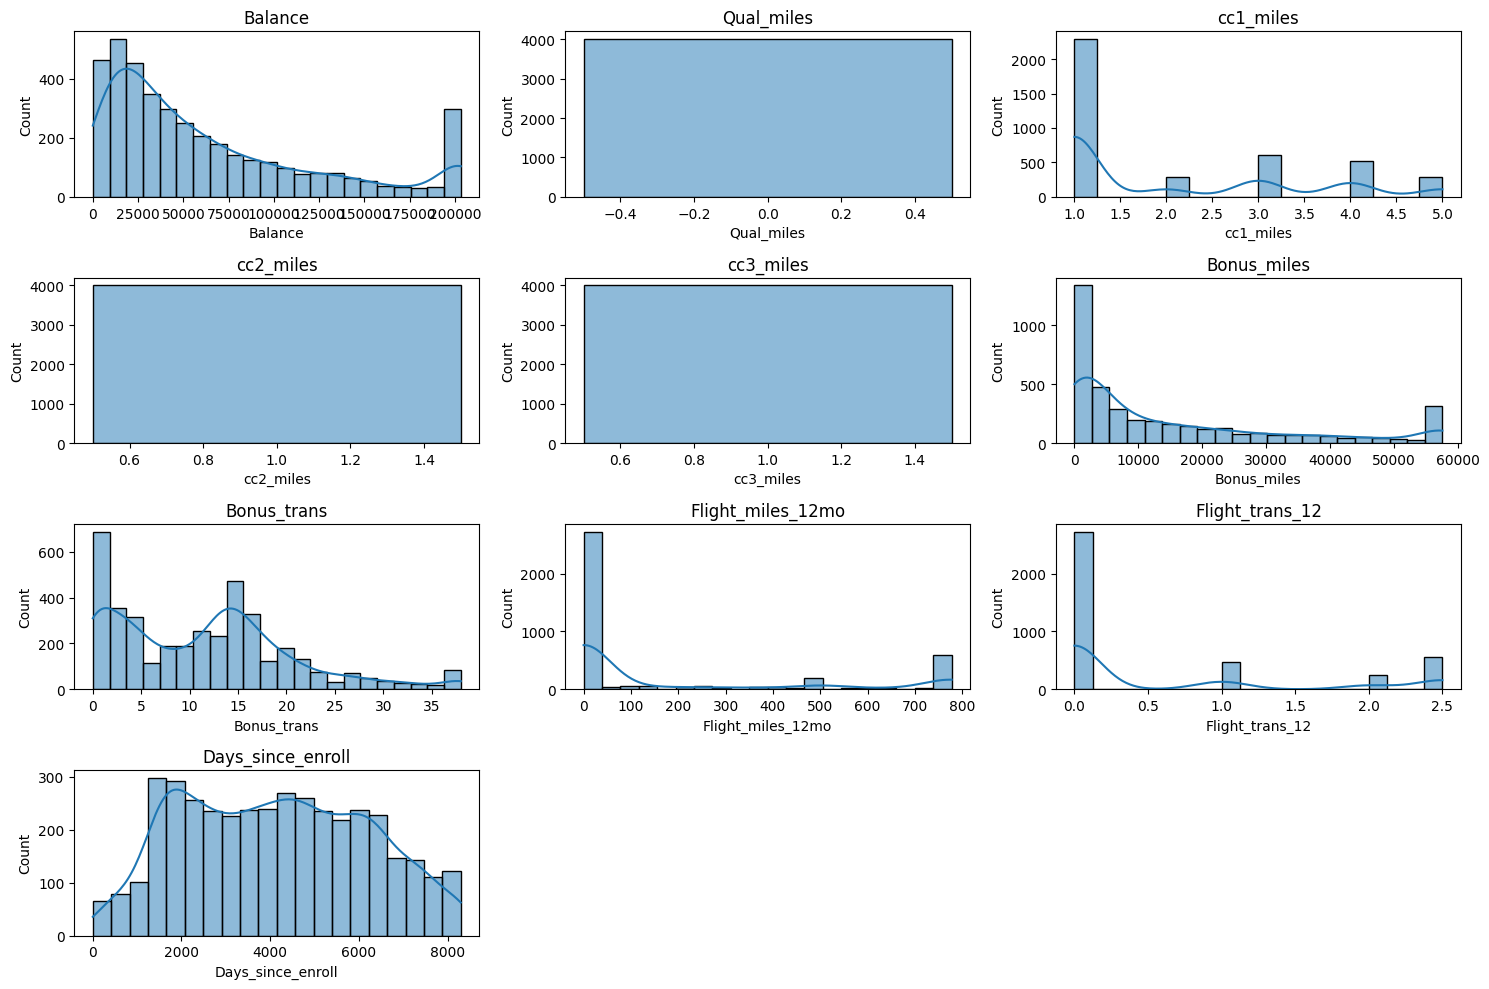

In [14]:
# Plot histograms for each numerical column
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

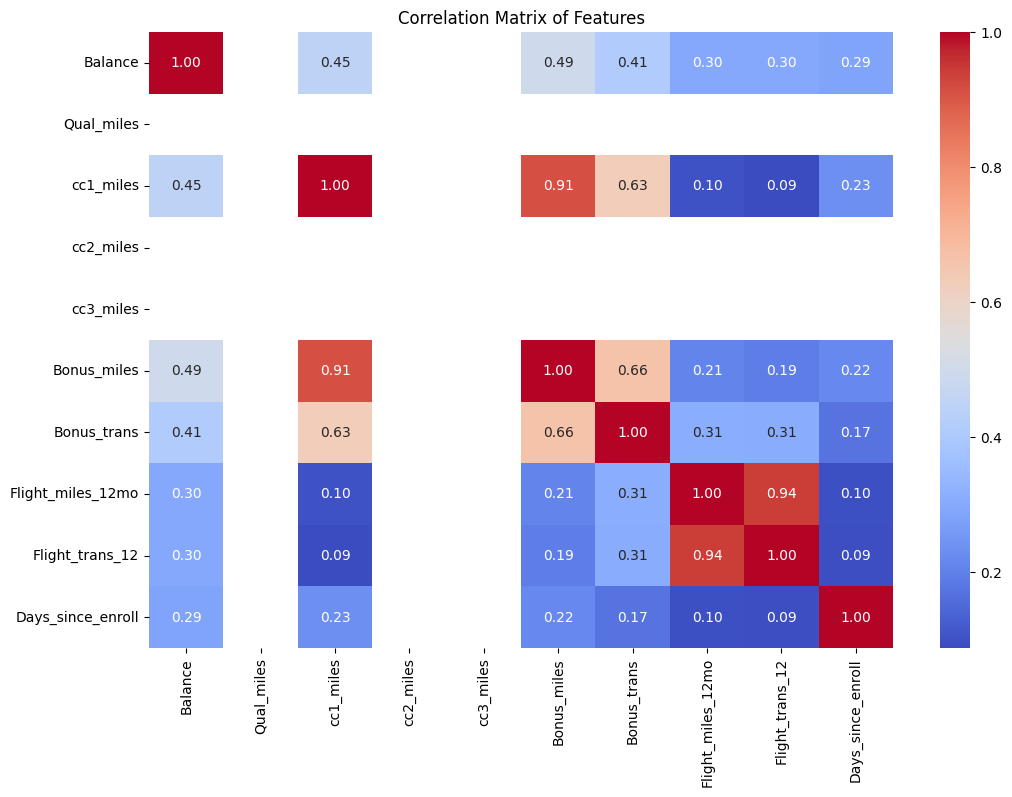

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the DataFrame
df_scaled = scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame (optional, but helpful for inspection)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975


In [40]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold. You can set a threshold value.
# A threshold of 0 removes features with no variance.
selector = VarianceThreshold(threshold=0)

# Fit and transform the scaled data
df_selected = selector.fit_transform(df_scaled)

# Get the names of the selected features
selected_features = df_scaled.columns[selector.get_support()]

# Convert the selected array back to a DataFrame (optional)
df_selected = pd.DataFrame(df_selected, columns=selected_features)

print("Original shape:", df_scaled.shape)
print("Shape after Variance Threshold:", df_selected.shape)
display(df_selected.head())

Original shape: (3999, 10)
Shape after Variance Threshold: (3999, 7)


,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,-0.769578,-0.843091,-1.148854,-0.604313,-0.626143,1.395454
1,-0.758947,-0.769578,-0.840822,-1.039133,-0.604313,-0.626143,1.379957
2,-0.382070,-0.769578,-0.624581,-0.819689,-0.604313,-0.626143,1.411920
3,-0.835106,-0.769578,-0.825052,-1.148854,-0.604313,-0.626143,1.372208
4,0.579265,1.409471,1.543191,1.594189,2.034489,2.020176,1.363975


In [41]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000
mean,63768.635784,0.0,2.059515,1.0,1.0,15410.730683,11.470618,178.055639,0.591523,4118.55939
std,58673.700736,0.0,1.376919,0.0,0.0,18074.733482,9.115104,294.678028,0.944826,2065.13454
min,0.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.00000
25%,18527.500000,0.0,1.000000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2330.00000
50%,43097.000000,0.0,1.000000,1.0,1.0,7171.000000,12.000000,0.000000,0.000000,4096.00000
75%,92404.000000,0.0,3.000000,1.0,1.0,23800.500000,17.000000,311.000000,1.000000,5790.50000
max,203218.750000,0.0,5.000000,1.0,1.0,57626.250000,38.000000,777.500000,2.500000,8296.00000


In [42]:
df_scaled.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.0,3.999000e+03,3999.0,3999.0,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,-5.685763e-17,0.0,1.705729e-16,0.0,0.0,-2.842882e-17,2.842882e-17,-7.107204e-18,4.264322e-17,5.685763e-17
std,1.000125e+00,0.0,1.000125e+00,0.0,0.0,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.086971e+00,0.0,-7.695784e-01,0.0,0.0,-8.527184e-01,-1.258576e+00,-6.043135e-01,-6.261434e-01,-1.993611e+00
25%,-7.711597e-01,0.0,-7.695784e-01,0.0,0.0,-7.835524e-01,-9.294109e-01,-6.043135e-01,-6.261434e-01,-8.661823e-01
50%,-3.523592e-01,0.0,-7.695784e-01,0.0,0.0,-4.559271e-01,5.808475e-02,-6.043135e-01,-6.261434e-01,-1.092530e-02
75%,4.881053e-01,0.0,6.831212e-01,0.0,0.0,4.642292e-01,6.066935e-01,4.512077e-01,4.323844e-01,8.097050e-01
max,2.377003e+00,0.0,2.135821e+00,0.0,0.0,2.335902e+00,2.910850e+00,2.034489e+00,2.020176e+00,2.023095e+00


In [43]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000
mean,63768.635784,0.0,2.059515,1.0,1.0,15410.730683,11.470618,178.055639,0.591523,4118.55939
std,58673.700736,0.0,1.376919,0.0,0.0,18074.733482,9.115104,294.678028,0.944826,2065.13454
min,0.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.00000
25%,18527.500000,0.0,1.000000,1.0,1.0,1250.000000,3.000000,0.000000,0.000000,2330.00000
50%,43097.000000,0.0,1.000000,1.0,1.0,7171.000000,12.000000,0.000000,0.000000,4096.00000
75%,92404.000000,0.0,3.000000,1.0,1.0,23800.500000,17.000000,311.000000,1.000000,5790.50000
max,203218.750000,0.0,5.000000,1.0,1.0,57626.250000,38.000000,777.500000,2.500000,8296.00000


In [44]:
df.iloc[:,5:6]

,Bonus_miles
0,174.0
1,215.0
2,4123.0
3,500.0
4,43300.0
...,...
3994,8525.0
3995,981.0
3996,25447.0
3997,500.0


In [45]:
# Select numerical columns for outlier handling
numerical_cols = df.select_dtypes(include=np.number).columns

# Replace outliers with upper/lower bounds based on IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, np.where(df[col] < lower_bound, lower_bound, df[col]))

print("Outliers replaced with IQR bounds.")

# Display the first few rows to see the changes
display(df.head())

Outliers replaced with IQR bounds.


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0


In [46]:
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975


In [47]:
df_selected.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,-0.769578,-0.843091,-1.148854,-0.604313,-0.626143,1.395454
1,-0.758947,-0.769578,-0.840822,-1.039133,-0.604313,-0.626143,1.379957
2,-0.382070,-0.769578,-0.624581,-0.819689,-0.604313,-0.626143,1.411920
3,-0.835106,-0.769578,-0.825052,-1.148854,-0.604313,-0.626143,1.372208
4,0.579265,1.409471,1.543191,1.594189,2.034489,2.020176,1.363975


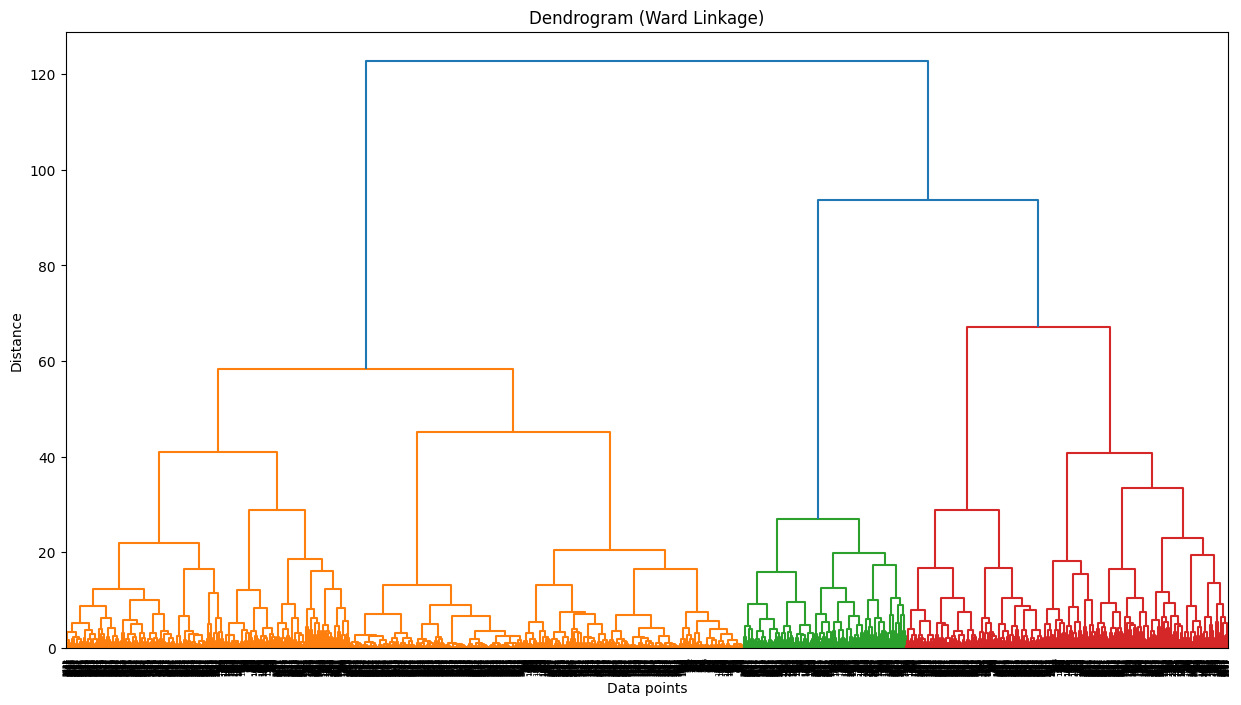

Silhouette score for ward linkage: 0.3101413840868056
Silhouette score for complete linkage: 0.25978867298174974
Silhouette score for average linkage: 0.2885950568157202
Silhouette score for single linkage: 0.16434159817362945

Silhouette Scores for Agglomerative Clustering with Different Linkage Methods:


{'ward': np.float64(0.3101413840868056),
 'complete': np.float64(0.25978867298174974),
 'average': np.float64(0.2885950568157202),
 'single': np.float64(0.16434159817362945)}

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate the dendrogram using the 'ward' linkage
plt.figure(figsize=(15, 8))
dendrogram(linkage(df_selected, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Evaluate different linkage methods for Agglomerative Clustering
linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores_agg = {}

for linkage_method in linkage_methods:
    try:
        # Apply Agglomerative Clustering
        # Using 3 clusters based on previous analysis (K-Means and Silhouette scores)
        agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
        clusters_agg = agg_clustering.fit_predict(df_selected)

        # Calculate Silhouette Score
        if len(set(clusters_agg)) > 1:
            score = silhouette_score(df_selected, clusters_agg)
            silhouette_scores_agg[linkage_method] = score
            print(f"Silhouette score for {linkage_method} linkage: {score}")
        else:
            print(f"Agglomerative Clustering with {linkage_method} linkage resulted in only one cluster. Cannot calculate Silhouette score.")

    except Exception as e:
        print(f"Could not perform Agglomerative Clustering with {linkage_method} linkage: {e}")

# Display the silhouette scores for each linkage method
print("\nSilhouette Scores for Agglomerative Clustering with Different Linkage Methods:")
display(silhouette_scores_agg)

Silhouette score for 2 clusters: 0.3421869984245719
Silhouette score for 3 clusters: 0.34076645351622303
Silhouette score for 4 clusters: 0.3411776895124208
Silhouette score for 5 clusters: 0.2695576950704476
Silhouette score for 6 clusters: 0.26906616475155015
Silhouette score for 7 clusters: 0.27642988799522883
Silhouette score for 8 clusters: 0.26841381793045993
Silhouette score for 9 clusters: 0.2641634011144002
Silhouette score for 10 clusters: 0.26406107355090036


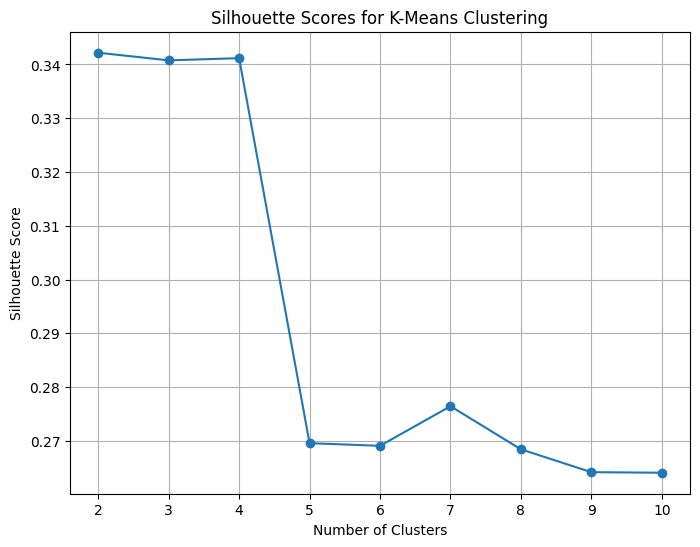

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters_kmeans = kmeans.fit_predict(df_selected)
    score = silhouette_score(df_selected, clusters_kmeans)
    silhouette_scores.append(score)
    print(f"Silhouette score for {n_clusters} clusters: {score}")

# Optionally, plot the silhouette scores to visualize the best number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

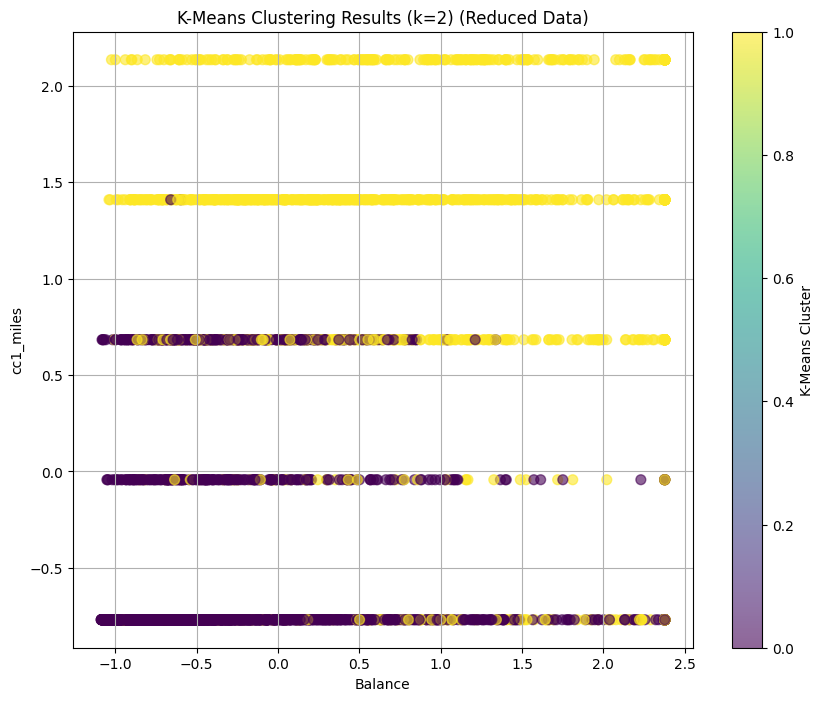

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(df_selected)

# Add the cluster labels to the reduced DataFrame (optional)
df_selected['KMeans_Cluster'] = clusters_kmeans

# Visualize the K-Means clusters on the reduced data
plt.figure(figsize=(10, 8))
plt.scatter(df_selected.iloc[:, 0], df_selected.iloc[:, 1], c=df_selected['KMeans_Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('K-Means Clustering Results (k=2) (Reduced Data)')
plt.xlabel(df_selected.columns[0])
plt.ylabel(df_selected.columns[1])
plt.colorbar(label='K-Means Cluster')
plt.grid(True)
plt.show()

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN. You may need to experiment with eps and min_samples values.
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example values, can be tuned
clusters_dbscan = dbscan.fit_predict(df_selected) # Apply on the reduced data

# Add the cluster labels to the reduced DataFrame (optional)
df_selected['DBSCAN_Cluster'] = clusters_dbscan

# Evaluate the clustering results
# The silhouette score requires at least 2 clusters and more than 1 sample per cluster.
if len(set(clusters_dbscan)) > 1:
    try:
        silhouette_avg = silhouette_score(df_selected.drop('DBSCAN_Cluster', axis=1), clusters_dbscan)
        print(f"Silhouette Score for DBSCAN: {silhouette_avg}")
    except ValueError:
        print("Could not calculate Silhouette Score (e.g., only one cluster or all points are noise).")
else:
    print("DBSCAN resulted in only one cluster or all points are noise.")

# Display the number of data points in each cluster (including noise as -1)
print("\nNumber of data points in each cluster:")
display(pd.Series(clusters_dbscan).value_counts())

Silhouette Score for DBSCAN: -0.13314293276129588

Number of data points in each cluster:


,count
0,1491
-1,1435
6,270
5,184
1,158
3,142
2,73
19,59
10,21
11,19


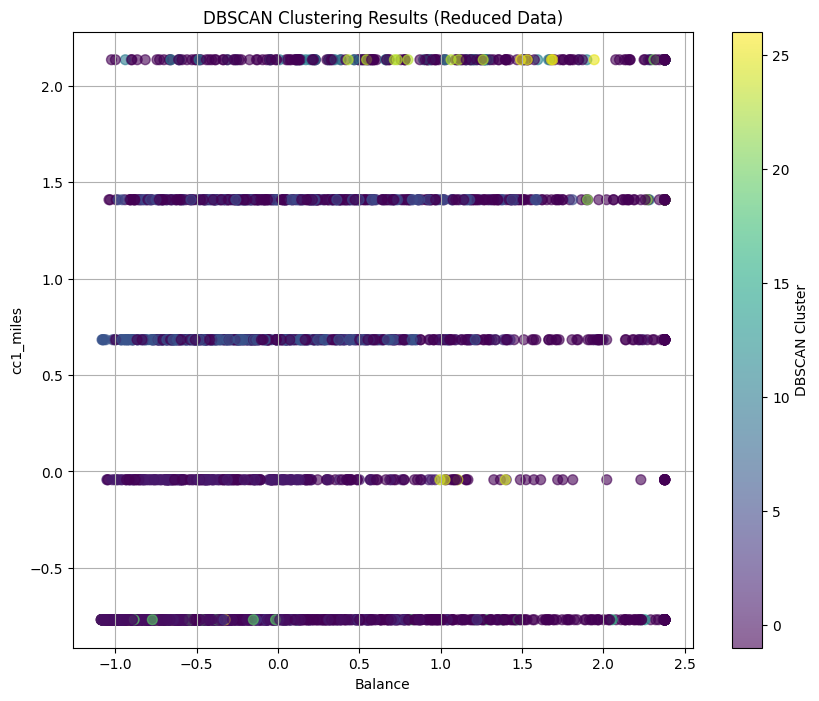

In [54]:
# Visualize the DBSCAN clusters on the reduced data
plt.figure(figsize=(10, 8))
plt.scatter(df_selected.iloc[:, 0], df_selected.iloc[:, 1], c=df_selected['DBSCAN_Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering Results (Reduced Data)')
plt.xlabel(df_selected.columns[0])
plt.ylabel(df_selected.columns[1])
plt.colorbar(label='DBSCAN Cluster')
plt.grid(True)
plt.show()

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import itertools

# Define different values for eps and min_samples to try
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_params = {}

print("Evaluating different DBSCAN hyperparameter combinations:")

# Iterate through all combinations of eps and min_samples
for eps, min_samples in itertools.product(eps_values, min_samples_values):
    print(f"\nTrying eps={eps}, min_samples={min_samples}")
    try:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(df_selected)

        # Evaluate the clustering results
        # The silhouette score requires at least 2 clusters and more than 1 sample per cluster.
        if len(set(clusters_dbscan)) > 1 and -1 in set(clusters_dbscan) and len(set(clusters_dbscan)) > 2:
             # Filter out noise points (-1) for silhouette score calculation
            core_samples_mask = np.zeros_like(clusters_dbscan, dtype=bool)
            core_samples_mask[dbscan.core_sample_indices_] = True
            labels = clusters_dbscan[core_samples_mask]
            X_filtered = df_selected[core_samples_mask]

            if len(set(labels)) > 1:
                score = silhouette_score(X_filtered, labels)

                print(f"  Silhouette Score: {score}")
                print("  Number of clusters (excluding noise):", len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0))
                print("  Number of noise points:", list(clusters_dbscan).count(-1))

                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
            else:
                 print("  Could not calculate Silhouette Score (only one cluster found excluding noise).")

        elif len(set(clusters_dbscan)) == 1:
             print("  DBSCAN resulted in only one cluster.")
        else:
            print("  Could not calculate Silhouette Score (e.g., only one cluster or all points are noise).")


    except Exception as e:
        print(f"  Could not perform DBSCAN with eps={eps}, min_samples={min_samples}: {e}")

print("\nBest Silhouette Score:", best_score)
print("Best Parameters:", best_params)

Evaluating different DBSCAN hyperparameter combinations:

Trying eps=0.3, min_samples=5
  Silhouette Score: -0.13345121874627391
  Number of clusters (excluding noise): 24
  Number of noise points: 2441

Trying eps=0.3, min_samples=10
  Silhouette Score: 0.14525560304414667
  Number of clusters (excluding noise): 5
  Number of noise points: 2779

Trying eps=0.3, min_samples=15
  Silhouette Score: 0.11090558664721807
  Number of clusters (excluding noise): 3
  Number of noise points: 2919

Trying eps=0.3, min_samples=20
  Silhouette Score: 0.1762033119303574
  Number of clusters (excluding noise): 2
  Number of noise points: 2999

Trying eps=0.5, min_samples=5
  Silhouette Score: 0.37179662706255817
  Number of clusters (excluding noise): 24
  Number of noise points: 1447

Trying eps=0.5, min_samples=10
  Silhouette Score: 0.2858498724347836
  Number of clusters (excluding noise): 10
  Number of noise points: 1903

Trying eps=0.5, min_samples=15
  Silhouette Score: 0.32551963557659286
 

# Task
Apply DBSCAN clustering to the data, evaluate the results, and visualize the clusters.

## Apply dbscan clustering

### Subtask:
Apply the DBSCAN clustering algorithm to the scaled data (`df_scaled`). We'll need to choose appropriate values for the `eps` and `min_samples` parameters.


**Reasoning**:
Apply DBSCAN clustering to the scaled data using initial parameters and add the cluster labels to the original dataframe.



**Reasoning**:
Evaluate the results of DBSCAN clustering by examining the number of clusters and noise points and visualize the clusters.



## Evaluate dbscan results

### Subtask:
Evaluate the clustering results using a metric like the Silhouette score.


**Reasoning**:
Import the silhouette_score metric and calculate the Silhouette score for the DBSCAN clustering results, handling the case where the score cannot be calculated.

